## Regression Modeling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(1337, 7)

In [11]:
df.size

9359

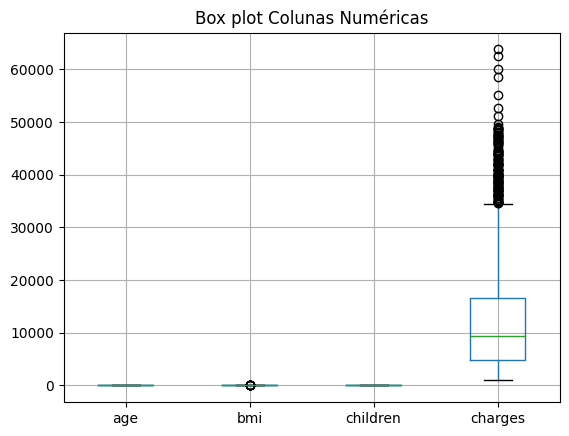

In [12]:
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot Colunas Numéricas')
plt.show()

In [13]:
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

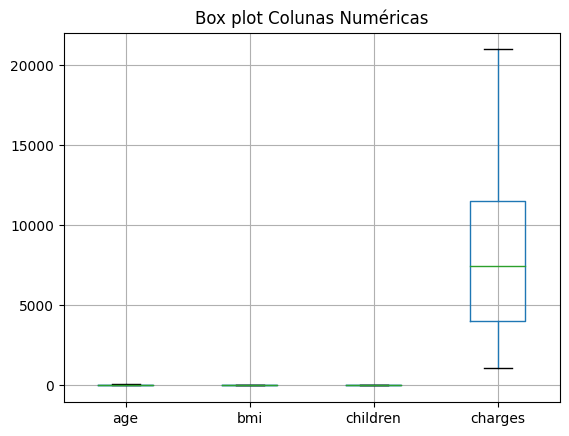

In [14]:
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot Colunas Numéricas')
plt.show()

In [15]:
df_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


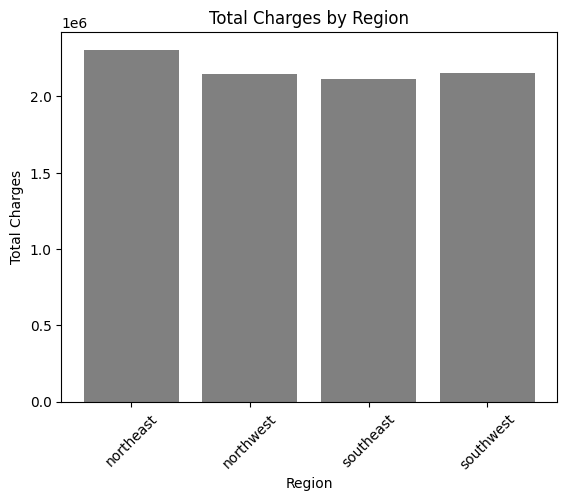

In [16]:
charges_by_region = df_cleaned.groupby('region')['charges'].sum()
plt.bar(charges_by_region.index, charges_by_region.values, color='grey')
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.title('Total Charges by Region')
plt.xticks(rotation=45)
plt.show()

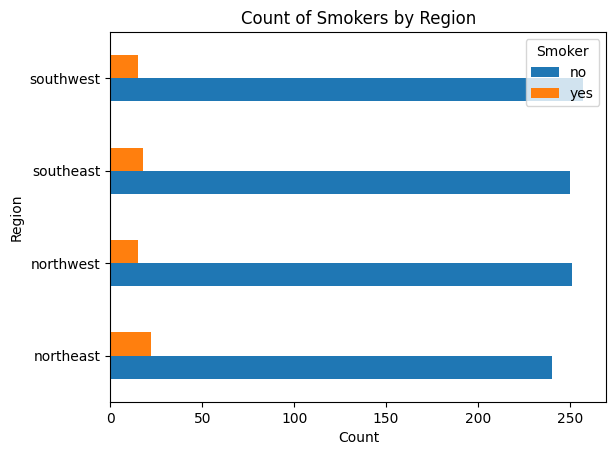

In [17]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

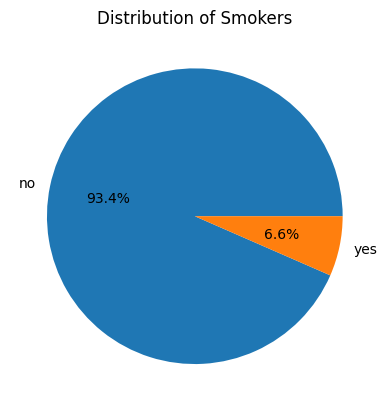

In [18]:
smoker_counts = df_cleaned['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Smokers')
plt.show()

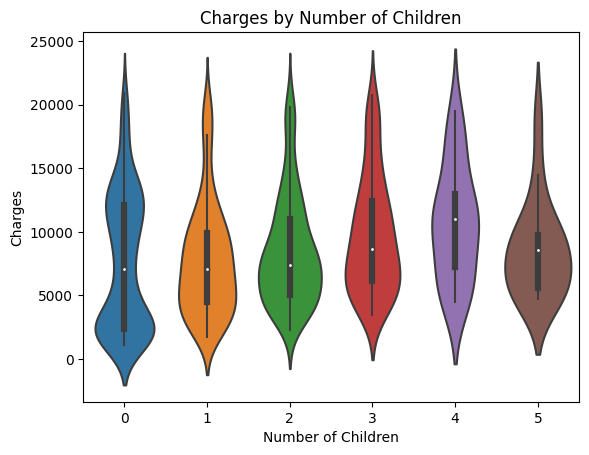

In [19]:
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges by Number of Children')
plt.show()

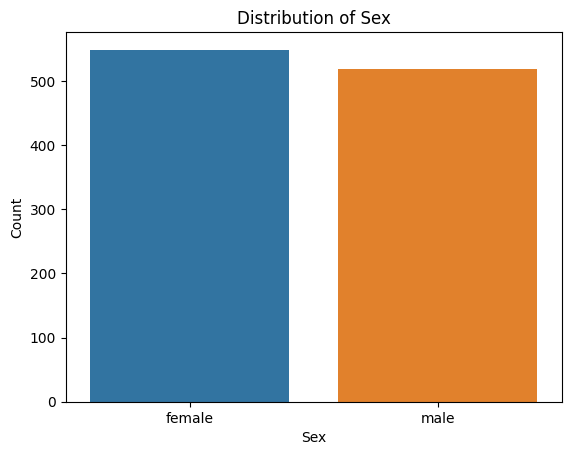

In [20]:
sns.countplot(x='sex', data=df_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

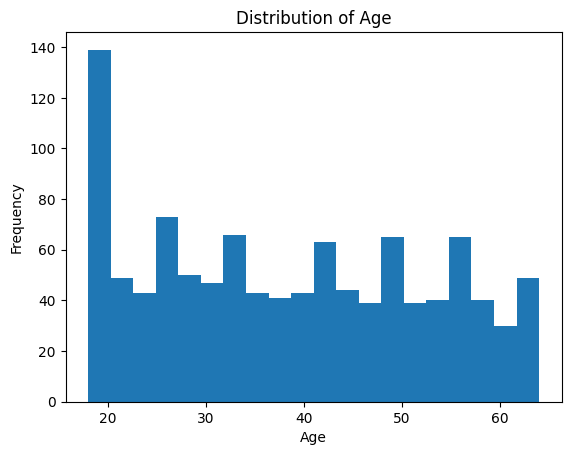

In [21]:
df_cleaned['age'].plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

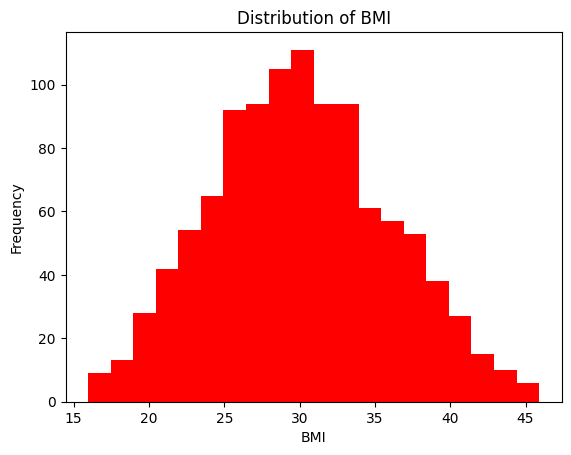

In [22]:
df_cleaned['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

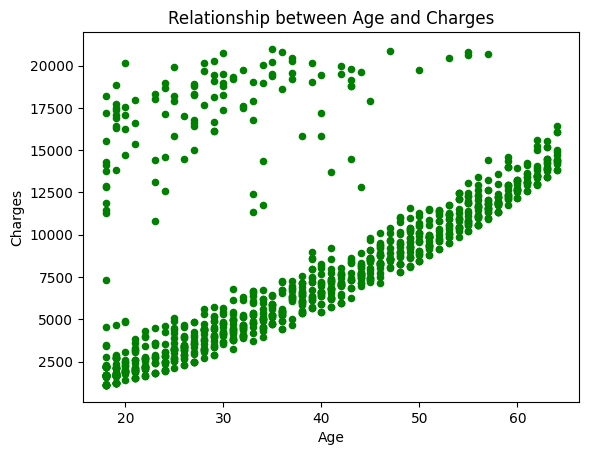

In [23]:
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

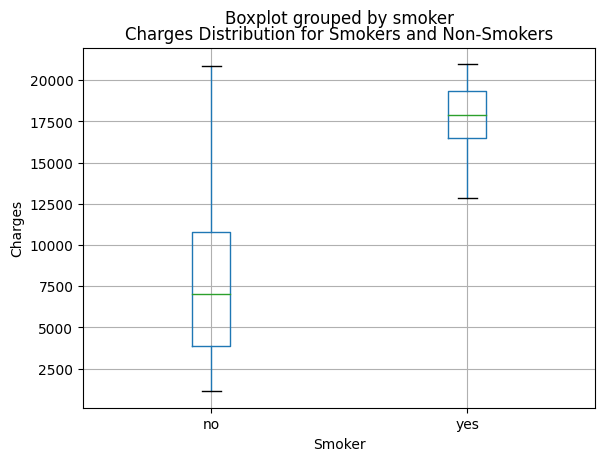

In [24]:
df_cleaned.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

In [25]:
df_cleaned['age_group'] = pd.cut(df_cleaned['age'],
                                 bins=[0, 25, 40, 60, df_cleaned['age'].max()],
                                 labels=['Young', 'Adult', 'Middle-aged', 'Senior']
                                )

In [26]:
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region')
label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])

In [27]:
df_encoded.head()

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
0,19,female,27.90,0,yes,16884.9240,Young,False,False,False,True,1
1,18,male,33.77,1,no,1725.5523,Young,False,False,True,False,0
2,28,male,33.00,3,no,4449.4620,Adult,False,False,True,False,0
4,32,male,28.88,0,no,3866.8552,Adult,False,True,False,False,0
5,31,female,25.74,0,no,3756.6216,Adult,False,False,True,False,0


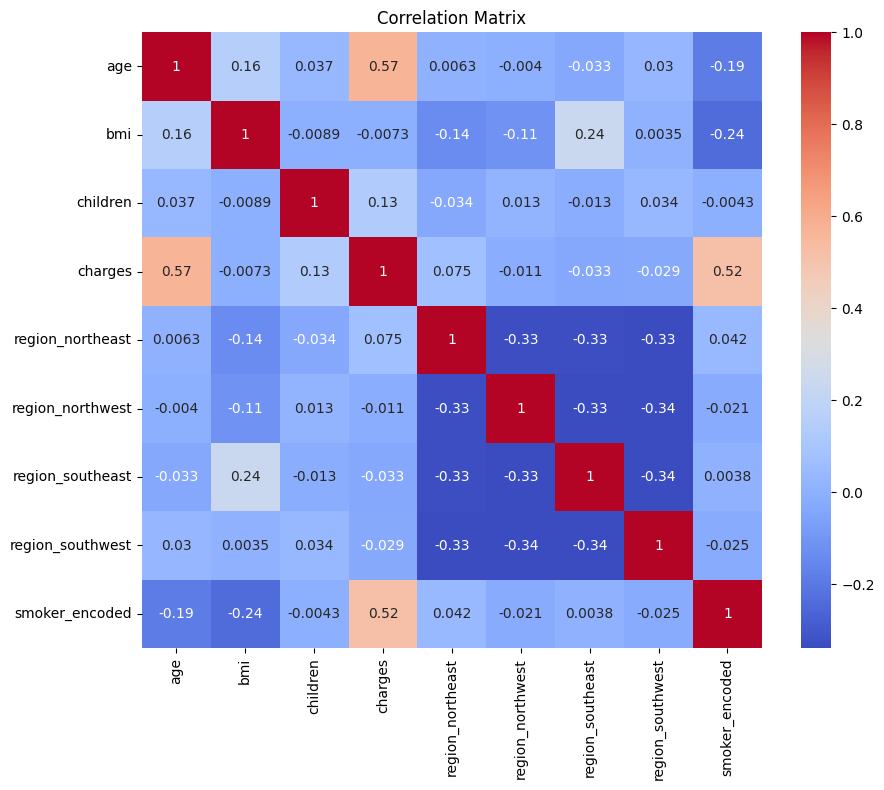

Relevant features based on correlation:
['age', 'smoker_encoded']


In [31]:
corr_matrix = df_encoded[["age",
                          "bmi",
                          "children",
                          "charges",
                          "region_northeast",
                          "region_northwest",
                          "region_southeast",
                          "region_southwest",
                          "smoker_encoded"]
                        ].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

threshold = 0.5
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist()
print("Relevant features based on correlation:") 
print(relevant_features)

In [32]:
X = df_encoded[['age', 'smoker_encoded']]
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

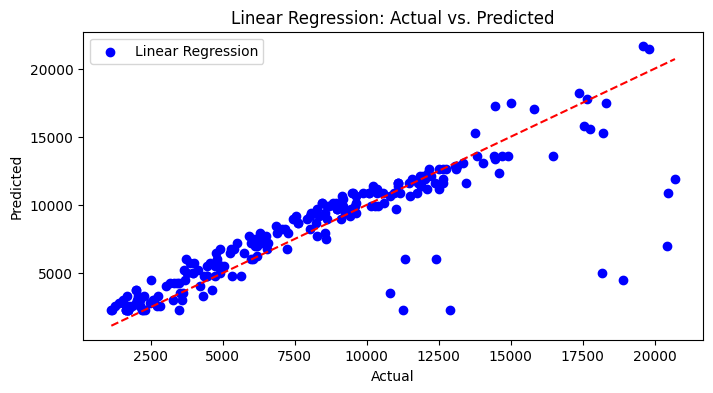

In [33]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [34]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

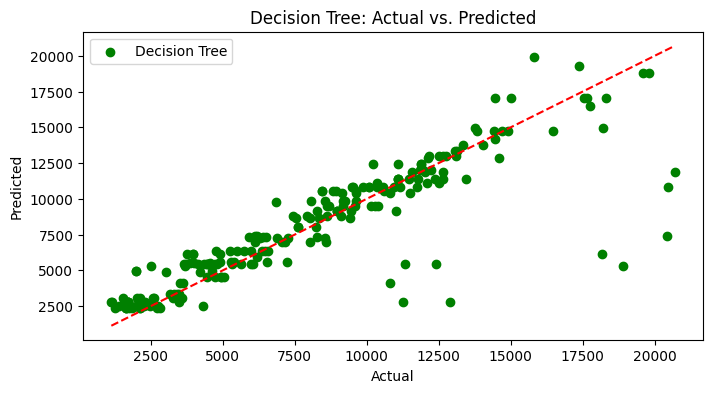

In [35]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [36]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

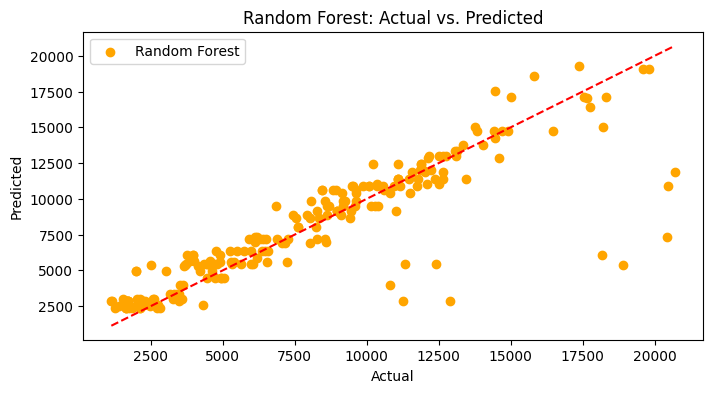

In [37]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [38]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

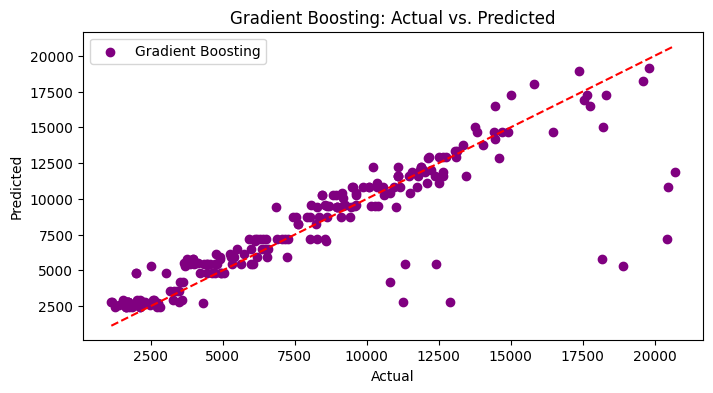

In [39]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [40]:
print("Linear Regression - MSE: ", lr_mse)
print("Linear Regression - MAE: ", lr_mae)
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)
print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - MAE: ", gb_mae)

Linear Regression - MSE:  5958015.664548767
Linear Regression - MAE:  1294.779080575581
Decision Tree - MSE:  5728632.311218643
Decision Tree - MAE:  1275.0243094744608
Random Forest - MSE:  5696642.219514263
Random Forest - MAE:  1270.9823722596766
Gradient Boosting - MSE:  5620075.226137549
Gradient Boosting - MAE:  1234.9739469039018


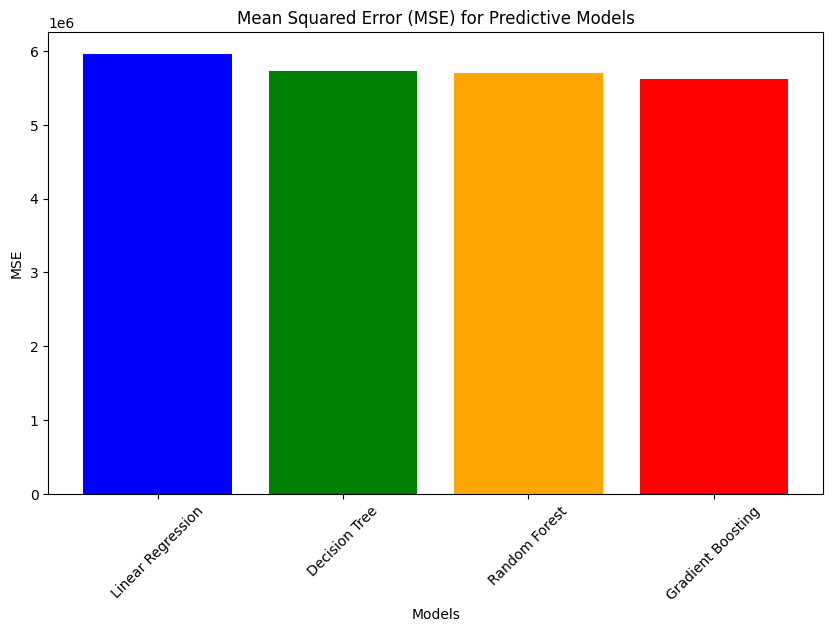

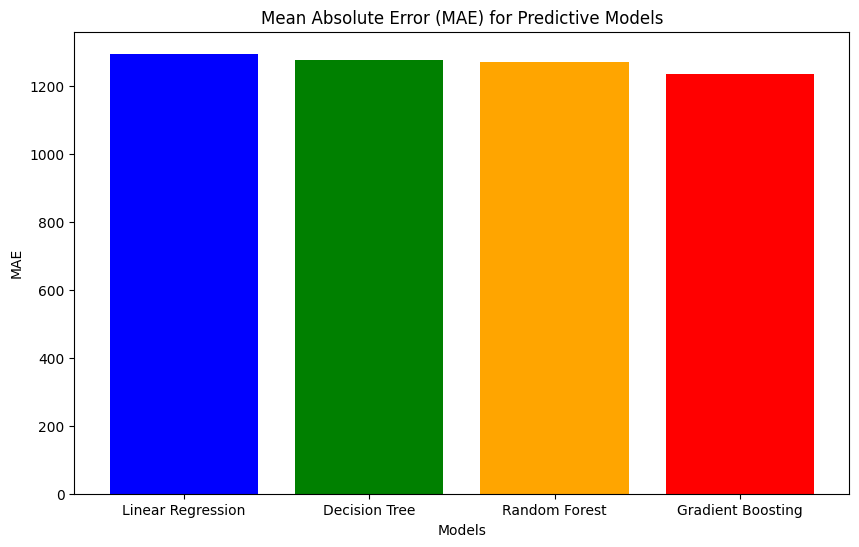

In [41]:
mse_values = [lr_mse, dt_mse, rf_mse, gb_mse]
mae_values = [lr_mae, dt_mae, rf_mae, gb_mae]

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=colors)
plt.title('Mean Squared Error (MSE) for Predictive Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=colors)
plt.title('Mean Absolute Error (MAE) for Predictive Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.show()

In [42]:
print("Linear Regression:")
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)

Linear Regression:
Intercept: -2114.064643174973
Coefficients: [  245.45032705 13001.55159468]


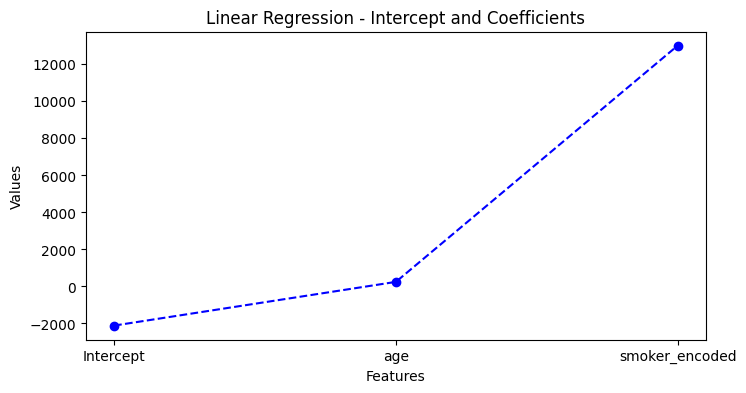

In [43]:
linear_regression_intercept = lr_model.intercept_
linear_regression_coefficients = [lr_model.coef_[0], lr_model.coef_[1]]

features = ['Intercept', 'age', 'smoker_encoded']
values = [linear_regression_intercept] + linear_regression_coefficients

plt.figure(figsize=(8, 4))
plt.scatter(features, values, color='blue')
plt.plot(features, values, color='blue', linestyle='--')
plt.title('Linear Regression - Intercept and Coefficients')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [44]:
print("Decision Tree:")
importance = dt_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Decision Tree:
age: 0.6283321204573399
smoker_encoded: 0.37166787954265995


<Figure size 800x400 with 0 Axes>

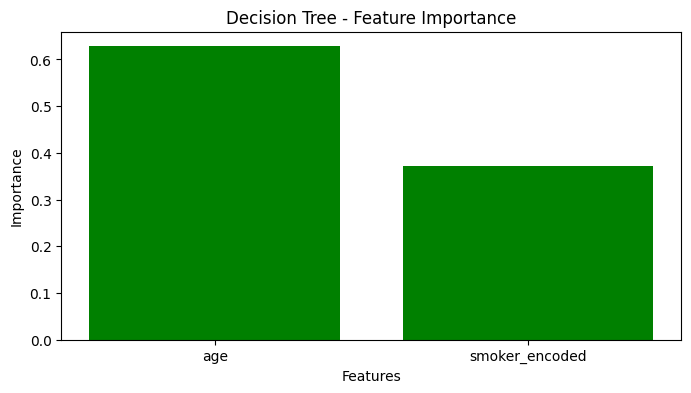

In [46]:
decision_tree_feature_importance =  [importance[0], importance[1]]
plt.figure(figsize=(8, 4))
plt.bar(['age', 'smoker_encoded'], decision_tree_feature_importance, color='green')
plt.title('Decision Tree - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [47]:
print("Random Forest:")
importance = rf_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Random Forest:
age: 0.605502033390055
smoker_encoded: 0.394497966609945


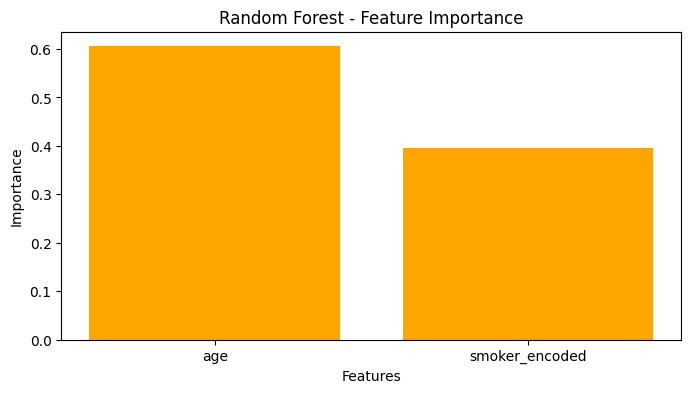

In [48]:
# Random Forest
random_forest_feature_importance = [importance[0], importance[1]]
plt.figure(figsize=(8, 4))
plt.bar(['age', 'smoker_encoded'], random_forest_feature_importance, color='orange')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [49]:
print("Gradient Boosting:")
importance = gb_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Gradient Boosting:
age: 0.6199252235871212
smoker_encoded: 0.3800747764128789


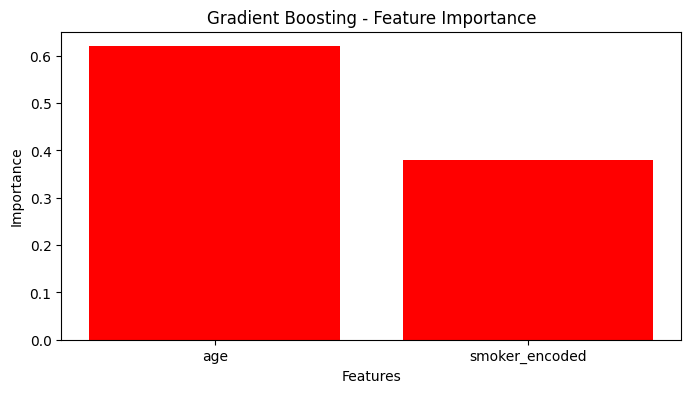

In [50]:
gradient_boosting_feature_importances = [importance[0], importance[1]]
plt.figure(figsize=(8, 4))
plt.bar(['age', 'smoker_encoded'], gradient_boosting_feature_importances, color='red')
plt.title('Gradient Boosting - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [51]:
new_data = pd.DataFrame({'age': [30], 'smoker_encoded': [1]})
# Linear Regression
lr_predictions = lr_model.predict(new_data)
print("Linear Regression Predictions:", lr_predictions)
# Decision Tree
dt_predictions = dt_model.predict(new_data)
print("Decision Tree Predictions:", dt_predictions)
# Random Forest
rf_predictions = rf_model.predict(new_data)
print("Random Forest Predictions:", rf_predictions)
# Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Linear Regression Predictions: [18250.99676297]
Decision Tree Predictions: [19323.2621875]
Random Forest Predictions: [19303.02655247]
Gradient Boosting Predictions: [18919.38558574]


In [52]:
mse_values = [lr_mse, dt_mse, rf_mse, gb_mse]
mae_values = [lr_mae, dt_mae, rf_mae, gb_mae]
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

min_mse_index = mse_values.index(min(mse_values))
min_mae_index = mae_values.index(min(mae_values))

best_model_mse = models[min_mse_index]
best_mse = mse_values[min_mse_index]

best_model_mae = models[min_mae_index]
best_mae = mae_values[min_mae_index]

print("Best Model based on MSE: ", best_model_mse)
print("MSE: ", best_mse)
print("Best Model based on MAE: ", best_model_mae)
print("MAE: ", best_mae)

Best Model based on MSE:  Gradient Boosting
MSE:  5620075.226137549
Best Model based on MAE:  Gradient Boosting
MAE:  1234.9739469039018


In [53]:
new_data = pd.DataFrame({'age': [35], 'smoker_encoded': [0]})
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

new_data = pd.DataFrame({'age': [35], 'smoker_encoded': [1]})
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

new_data = pd.DataFrame({'age': [67], 'smoker_encoded': [0]})
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

new_data = pd.DataFrame({'age': [67], 'smoker_encoded': [1]})
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

new_data = pd.DataFrame({'age': [19], 'smoker_encoded': [0]})
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

new_data = pd.DataFrame({'age': [19], 'smoker_encoded': [1]})
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [6169.09883742]
Gradient Boosting Predictions: [19735.06590245]
Gradient Boosting Predictions: [14685.8553561]
Gradient Boosting Predictions: [19151.9711604]
Gradient Boosting Predictions: [2452.36779637]
Gradient Boosting Predictions: [16486.6220604]
